In [76]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

Import Data

In [77]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
5,1170,2,38.0
10,1800,3,82.0
4,1200,2,51.0
7,3300,4,155.0
17,1540,3,60.0


Scale X and y Values

In [78]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis=1))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [79]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

Implement Batch Gradient Descent

In [80]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    num_features = X.shape[1]
    
    w = np.ones(shape=(num_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b
        error = y_true-y_predicted
        w_grad = -(2/total_samples) * np.dot(X.T, error)
        b_grad = -(2/total_samples) * np.sum(error)
        
        w -= learning_rate*w_grad
        b -= learning_rate*b_grad
        
        cost = np.mean(np.power(error, 2))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
        print("epoch: {}, cost={}".format(i, cost))
    return w, b, cost, cost_list, epoch_list

In [81]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), epochs=500)
w, b, cost

epoch: 0, cost=0.2768777174681
epoch: 1, cost=0.262766734572546
epoch: 2, cost=0.24942344132744515
epoch: 3, cost=0.2368059263026728
epoch: 4, cost=0.22487456675994816
epoch: 5, cost=0.21359190367012681
epoch: 6, cost=0.20292252355565982
epoch: 7, cost=0.19283294678550084
epoch: 8, cost=0.18329152197010132
epoch: 9, cost=0.17426832612337637
epoch: 10, cost=0.16573507027671067
epoch: 11, cost=0.15766501024727825
epoch: 12, cost=0.15003286227920162
epoch: 13, cost=0.14281472329145126
epoch: 14, cost=0.13598799548091794
epoch: 15, cost=0.12953131504282422
epoch: 16, cost=0.12342448478363385
epoch: 17, cost=0.11764841041389311
epoch: 18, cost=0.1121850403200481
epoch: 19, cost=0.10701730862525383
epoch: 20, cost=0.10212908135956808
epoch: 21, cost=0.09750510556972952
epoch: 22, cost=0.09313096120799244
epoch: 23, cost=0.0889930156482579
epoch: 24, cost=0.0850783806860264
epoch: 25, cost=0.08137487188653422
epoch: 26, cost=0.07787097015284175
epoch: 27, cost=0.0745557853926442
epoch: 28, co

epoch: 301, cost=0.009359533676560769
epoch: 302, cost=0.009341664327040802
epoch: 303, cost=0.009323862986476927
epoch: 304, cost=0.009306129386790398
epoch: 305, cost=0.009288463261051334
epoch: 306, cost=0.009270864343468913
epoch: 307, cost=0.009253332369381913
epoch: 308, cost=0.009235867075249551
epoch: 309, cost=0.0092184681986426
epoch: 310, cost=0.009201135478234784
epoch: 311, cost=0.009183868653794528
epoch: 312, cost=0.009166667466176791
epoch: 313, cost=0.009149531657315284
epoch: 314, cost=0.009132460970214853
epoch: 315, cost=0.009115455148944091
epoch: 316, cost=0.009098513938628108
epoch: 317, cost=0.00908163708544157
epoch: 318, cost=0.00906482433660188
epoch: 319, cost=0.00904807544036251
epoch: 320, cost=0.009031390146006544
epoch: 321, cost=0.00901476820384037
epoch: 322, cost=0.008998209365187474
epoch: 323, cost=0.008981713382382439
epoch: 324, cost=0.008965280008765047
epoch: 325, cost=0.008948908998674518
epoch: 326, cost=0.008932600107443827
epoch: 327, cost=0

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0, 0.5, 'Cost (MSE)')

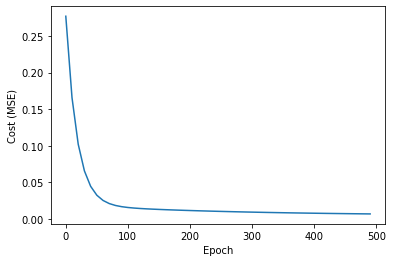

In [82]:
plt.plot(epoch_list, cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost (MSE)')

In [83]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])
    
    scaled_price = np.dot(w, scaled_X.T)+b
    price = sy.inverse_transform([scaled_price])
    
    return price

In [84]:
predict(2600, 4, w, b)

array([[128.45484403]])

In [85]:
predict(1000, 2, w, b)

array([[30.25309446]])

In [86]:
predict(1521, 3, w, b)

array([[70.16988315]])

Stochastic Gradient Descent

In [87]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    num_features = X.shape[1]
    
    w = np.ones(shape=(num_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        error = sample_y-y_predicted
        w_grad = -(2/total_samples) * np.dot(sample_x.T, error)
        b_grad = -(2/total_samples) * error
        
        w -= learning_rate*w_grad
        b -= learning_rate*b_grad
        
        cost = np.power(error, 2)
        
        if i%20==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
        print('Epoch: {}, cost={}'.format(i, cost))
    
    return w, b, cost, cost_list, epoch_list

In [88]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),epochs=10000)
w_sgd, b_sgd, cost_sgd

Epoch: 0, cost=0.0
Epoch: 1, cost=0.09316918098351136
Epoch: 2, cost=0.29965939836541783
Epoch: 3, cost=0.43512818763064237
Epoch: 4, cost=0.5132666495913544
Epoch: 5, cost=0.23572542402058366
Epoch: 6, cost=0.08466575420143621
Epoch: 7, cost=9.031263215380394e-06
Epoch: 8, cost=0.1086261537585778
Epoch: 9, cost=0.5089879697140964
Epoch: 10, cost=0.10779768037426071
Epoch: 11, cost=0.42775629990149283
Epoch: 12, cost=0.2184173871705687
Epoch: 13, cost=0.07811671696104121
Epoch: 14, cost=0.07794959095324926
Epoch: 15, cost=0.5027046775207454
Epoch: 16, cost=0.5007482929077816
Epoch: 17, cost=0.38649236991312186
Epoch: 18, cost=0.17541609850155737
Epoch: 19, cost=0.21367882686609974
Epoch: 20, cost=0.10395519595407951
Epoch: 21, cost=0.05573318239643557
Epoch: 22, cost=0.962868430109314
Epoch: 23, cost=0.22353029165462107
Epoch: 24, cost=0.05470781781087676
Epoch: 25, cost=0.27793728195103634
Epoch: 26, cost=0.24676706588580546
Epoch: 27, cost=0.06769658882486733
Epoch: 28, cost=0.375743

Epoch: 651, cost=0.3361533319592513
Epoch: 652, cost=0.06796929350355134
Epoch: 653, cost=0.0867195582284669
Epoch: 654, cost=0.07469323195604603
Epoch: 655, cost=0.03139621380283201
Epoch: 656, cost=0.0035740364521626047
Epoch: 657, cost=0.020214056255485644
Epoch: 658, cost=0.06849722824691805
Epoch: 659, cost=0.0035110152779098446
Epoch: 660, cost=0.0019342721220228932
Epoch: 661, cost=0.0019301338633976864
Epoch: 662, cost=0.04106972769921288
Epoch: 663, cost=0.0019438332180288847
Epoch: 664, cost=0.003510653738850639
Epoch: 665, cost=0.04102948306509684
Epoch: 666, cost=0.003527098767461183
Epoch: 667, cost=0.030706201732966176
Epoch: 668, cost=0.10246678342143624
Epoch: 669, cost=0.0679706801822414
Epoch: 670, cost=2.6395517670671444e-07
Epoch: 671, cost=0.10174118882092523
Epoch: 672, cost=0.06610347063644145
Epoch: 673, cost=0.04450424614402778
Epoch: 674, cost=0.10080194995184051
Epoch: 675, cost=0.0032529358367339905
Epoch: 676, cost=0.32595181387355016
Epoch: 677, cost=0.007

Epoch: 1296, cost=0.020217700037588934
Epoch: 1297, cost=0.04569416669229115
Epoch: 1298, cost=0.014264436728011348
Epoch: 1299, cost=0.0014068370755142437
Epoch: 1300, cost=0.009371292511552817
Epoch: 1301, cost=0.0025546595728684813
Epoch: 1302, cost=0.009340530661387698
Epoch: 1303, cost=8.172548192150802e-05
Epoch: 1304, cost=8.154924968742684e-05
Epoch: 1305, cost=0.0019674867464829025
Epoch: 1306, cost=0.1546236240210048
Epoch: 1307, cost=0.025111550864616413
Epoch: 1308, cost=0.019865224334806975
Epoch: 1309, cost=0.0005799098225157801
Epoch: 1310, cost=0.0020271870239493453
Epoch: 1311, cost=0.019786652139586476
Epoch: 1312, cost=0.015353916125538375
Epoch: 1313, cost=0.04475496049742091
Epoch: 1314, cost=0.019235398399641963
Epoch: 1315, cost=0.009155027569934788
Epoch: 1316, cost=0.0027180204061018425
Epoch: 1317, cost=0.03565003653169002
Epoch: 1318, cost=0.15167675192733943
Epoch: 1319, cost=0.0015760514402888032
Epoch: 1320, cost=0.0001320294960136305
Epoch: 1321, cost=0.0

Epoch: 1887, cost=0.004468462410665166
Epoch: 1888, cost=0.00993117368540306
Epoch: 1889, cost=0.019393931356712687
Epoch: 1890, cost=0.007382627858453546
Epoch: 1891, cost=0.0908520210644609
Epoch: 1892, cost=0.005552292938312699
Epoch: 1893, cost=0.006388207825723913
Epoch: 1894, cost=0.005551823480209052
Epoch: 1895, cost=0.01946619488517235
Epoch: 1896, cost=0.0019720936857946848
Epoch: 1897, cost=0.01943998254992659
Epoch: 1898, cost=0.09039563569858645
Epoch: 1899, cost=0.0002529860156736997
Epoch: 1900, cost=0.08987314761834164
Epoch: 1901, cost=0.0008949786569290291
Epoch: 1902, cost=0.009153817110649779
Epoch: 1903, cost=0.00422812289328522
Epoch: 1904, cost=0.001834772108700632
Epoch: 1905, cost=0.007583215822034613
Epoch: 1906, cost=0.005412460301587292
Epoch: 1907, cost=0.015077714368629917
Epoch: 1908, cost=0.007420834924704443
Epoch: 1909, cost=0.08886288821842361
Epoch: 1910, cost=0.019869148237251912
Epoch: 1911, cost=0.006593479418855436
Epoch: 1912, cost=1.41241022444

Epoch: 2561, cost=0.09638947233300588
Epoch: 2562, cost=0.009736667543692167
Epoch: 2563, cost=0.0018514174711239477
Epoch: 2564, cost=0.0016565266782165456
Epoch: 2565, cost=0.09613414708526928
Epoch: 2566, cost=0.003959322364087734
Epoch: 2567, cost=0.011214924416356804
Epoch: 2568, cost=0.001821928591106032
Epoch: 2569, cost=0.0016837249605558538
Epoch: 2570, cost=0.00030092851619950973
Epoch: 2571, cost=0.021529051413354774
Epoch: 2572, cost=0.0002941738489243156
Epoch: 2573, cost=0.002521111972809138
Epoch: 2574, cost=0.0009815697498740442
Epoch: 2575, cost=0.021506459641496674
Epoch: 2576, cost=0.010641567070352985
Epoch: 2577, cost=0.009621097198851358
Epoch: 2578, cost=0.021465915140343603
Epoch: 2579, cost=0.09567429027171243
Epoch: 2580, cost=0.002566421497454815
Epoch: 2581, cost=0.00036767082195588786
Epoch: 2582, cost=0.007177555889113948
Epoch: 2583, cost=0.013450692032207502
Epoch: 2584, cost=0.004006057885377352
Epoch: 2585, cost=0.008580976331431005
Epoch: 2586, cost=0

Epoch: 3008, cost=0.004837464157990519
Epoch: 3009, cost=0.0035915221416782726
Epoch: 3010, cost=0.003582425770176072
Epoch: 3011, cost=0.000919555657816357
Epoch: 3012, cost=0.09426124655528856
Epoch: 3013, cost=0.007669647959822708
Epoch: 3014, cost=0.0021750169582257376
Epoch: 3015, cost=0.004862205478363996
Epoch: 3016, cost=0.0035100949129211723
Epoch: 3017, cost=0.009657677817557164
Epoch: 3018, cost=0.02165942065945827
Epoch: 3019, cost=0.021612595585831923
Epoch: 3020, cost=0.007572743454521142
Epoch: 3021, cost=0.006634578964998918
Epoch: 3022, cost=0.007572668857583602
Epoch: 3023, cost=0.09369974943116743
Epoch: 3024, cost=0.00045437778709124564
Epoch: 3025, cost=0.0015058722939250968
Epoch: 3026, cost=0.0008051574241776761
Epoch: 3027, cost=0.0015291966427299231
Epoch: 3028, cost=0.008523472512024018
Epoch: 3029, cost=0.001516140451709972
Epoch: 3030, cost=0.0015115954416708545
Epoch: 3031, cost=0.021395553623183624
Epoch: 3032, cost=0.0015359976258297002
Epoch: 3033, cost=

Epoch: 3524, cost=0.009618237003518307
Epoch: 3525, cost=0.006425652936064078
Epoch: 3526, cost=0.0010794330248910487
Epoch: 3527, cost=7.856586517698259e-05
Epoch: 3528, cost=0.0026882761755761034
Epoch: 3529, cost=0.0003134267130694938
Epoch: 3530, cost=0.0014011901833659252
Epoch: 3531, cost=0.060573575545799674
Epoch: 3532, cost=0.004309801346550165
Epoch: 3533, cost=6.665835343183034e-05
Epoch: 3534, cost=0.00137620102760724
Epoch: 3535, cost=0.007398629043448374
Epoch: 3536, cost=0.009675712995955106
Epoch: 3537, cost=0.0013721518099475626
Epoch: 3538, cost=0.06021407432350704
Epoch: 3539, cost=0.0014045836049899148
Epoch: 3540, cost=0.009224005173028104
Epoch: 3541, cost=0.009723935586486786
Epoch: 3542, cost=0.05985123474950109
Epoch: 3543, cost=0.0003636155827622392
Epoch: 3544, cost=0.0595098280874066
Epoch: 3545, cost=0.010938328513139325
Epoch: 3546, cost=0.0028342419953994403
Epoch: 3547, cost=0.0012027033852487292
Epoch: 3548, cost=0.08874336070786734
Epoch: 3549, cost=0.

Epoch: 4032, cost=0.05489067544818102
Epoch: 4033, cost=0.007515893466418811
Epoch: 4034, cost=0.001097859958139517
Epoch: 4035, cost=0.0006178500725245916
Epoch: 4036, cost=0.054561334362566244
Epoch: 4037, cost=0.00847601617883962
Epoch: 4038, cost=0.007585026652701274
Epoch: 4039, cost=0.0017650325158578926
Epoch: 4040, cost=0.005902766665640971
Epoch: 4041, cost=0.05427887709380468
Epoch: 4042, cost=8.377337111190171e-07
Epoch: 4043, cost=0.006774306479702859
Epoch: 4044, cost=0.008418552861739759
Epoch: 4045, cost=0.005943145050476839
Epoch: 4046, cost=0.009927345561976232
Epoch: 4047, cost=5.602835574239525e-07
Epoch: 4048, cost=0.0007456671971432201
Epoch: 4049, cost=0.0023890862207564647
Epoch: 4050, cost=0.01879705579434532
Epoch: 4051, cost=0.001593525308105825
Epoch: 4052, cost=0.0839950412608152
Epoch: 4053, cost=0.0015657284618509173
Epoch: 4054, cost=0.00036369056404064216
Epoch: 4055, cost=0.0075683759331401645
Epoch: 4056, cost=0.007529491101990359
Epoch: 4057, cost=0.0

Epoch: 4612, cost=0.08012188280573537
Epoch: 4613, cost=0.0018592850563466197
Epoch: 4614, cost=0.0018544101900834925
Epoch: 4615, cost=0.047530925052153505
Epoch: 4616, cost=0.0019257727041852662
Epoch: 4617, cost=0.0004690946240674166
Epoch: 4618, cost=0.07999921464649358
Epoch: 4619, cost=0.006198379012497603
Epoch: 4620, cost=0.0018425490087729925
Epoch: 4621, cost=0.07977056187699998
Epoch: 4622, cost=0.005406937735495707
Epoch: 4623, cost=0.00025683083604464583
Epoch: 4624, cost=0.0004426417201394173
Epoch: 4625, cost=0.07964977096387763
Epoch: 4626, cost=0.04769406368885391
Epoch: 4627, cost=0.0018300430023482223
Epoch: 4628, cost=0.00044410416010216976
Epoch: 4629, cost=0.07957771544711545
Epoch: 4630, cost=0.07941863959393665
Epoch: 4631, cost=0.0017750065507328155
Epoch: 4632, cost=0.017651131856314412
Epoch: 4633, cost=0.008651872116773079
Epoch: 4634, cost=0.008618201474267659
Epoch: 4635, cost=0.006808255112829959
Epoch: 4636, cost=0.00032006345980936104
Epoch: 4637, cost=

Epoch: 5223, cost=0.000809618344385478
Epoch: 5224, cost=0.0780774615053001
Epoch: 5225, cost=0.00216357430840312
Epoch: 5226, cost=0.0024276067783947355
Epoch: 5227, cost=0.04115898437087938
Epoch: 5228, cost=3.228450756086533e-05
Epoch: 5229, cost=0.0006753977975847553
Epoch: 5230, cost=0.0008122905217697784
Epoch: 5231, cost=0.002185701899983881
Epoch: 5232, cost=0.006143476471960465
Epoch: 5233, cost=0.002190368685404776
Epoch: 5234, cost=0.0061995463793348944
Epoch: 5235, cost=0.0021761642613323893
Epoch: 5236, cost=0.006915824940935883
Epoch: 5237, cost=0.07786085872045792
Epoch: 5238, cost=0.00621739743510314
Epoch: 5239, cost=0.004862279754154969
Epoch: 5240, cost=0.0068834979610250075
Epoch: 5241, cost=0.0002947968448354262
Epoch: 5242, cost=3.33913002982614e-05
Epoch: 5243, cost=3.323749964448558e-05
Epoch: 5244, cost=0.004863911416614613
Epoch: 5245, cost=0.005429823465922187
Epoch: 5246, cost=0.002145562981938305
Epoch: 5247, cost=0.006858983390404413
Epoch: 5248, cost=0.00

Epoch: 5472, cost=0.017131769052839776
Epoch: 5473, cost=0.07538640352165993
Epoch: 5474, cost=0.004939593679233433
Epoch: 5475, cost=0.006320602046844645
Epoch: 5476, cost=0.001761349919191795
Epoch: 5477, cost=0.0017575517570524023
Epoch: 5478, cost=0.0022879951271765103
Epoch: 5479, cost=0.07516851720746817
Epoch: 5480, cost=0.0019141520997746537
Epoch: 5481, cost=0.007316673684292268
Epoch: 5482, cost=0.0019006055010763515
Epoch: 5483, cost=0.0046400217000399585
Epoch: 5484, cost=0.0005381349023812936
Epoch: 5485, cost=0.0168815537947233
Epoch: 5486, cost=0.002224946171259675
Epoch: 5487, cost=0.006189001248327871
Epoch: 5488, cost=3.605773742060456e-05
Epoch: 5489, cost=0.00725503899696097
Epoch: 5490, cost=3.717554997168174e-05
Epoch: 5491, cost=0.04072349004599366
Epoch: 5492, cost=0.007563482519266071
Epoch: 5493, cost=0.07492623376538855
Epoch: 5494, cost=0.04053102981046881
Epoch: 5495, cost=0.00171643316956734
Epoch: 5496, cost=0.07486392836555084
Epoch: 5497, cost=4.3115172

Epoch: 5896, cost=0.0005486982011833523
Epoch: 5897, cost=0.0026515835091453135
Epoch: 5898, cost=0.006258105420902834
Epoch: 5899, cost=0.007190436986745383
Epoch: 5900, cost=9.129915789455053e-09
Epoch: 5901, cost=0.0049325132502605895
Epoch: 5902, cost=0.004921872449853745
Epoch: 5903, cost=0.0017419047297019148
Epoch: 5904, cost=0.007292413373261035
Epoch: 5905, cost=0.016947690778376757
Epoch: 5906, cost=0.0005203834842118461
Epoch: 5907, cost=0.03685728507421836
Epoch: 5908, cost=0.004905443287017373
Epoch: 5909, cost=0.07384075862047791
Epoch: 5910, cost=2.5903474925812636e-06
Epoch: 5911, cost=0.00566984430482262
Epoch: 5912, cost=0.004920672585209178
Epoch: 5913, cost=0.0005343329434274082
Epoch: 5914, cost=1.1998251099099093e-07
Epoch: 5915, cost=0.006010967070355808
Epoch: 5916, cost=0.0005393297425047675
Epoch: 5917, cost=5.7296072270630655e-08
Epoch: 5918, cost=0.01693730817381437
Epoch: 5919, cost=3.0953779040595485e-06
Epoch: 5920, cost=0.005651522294144263
Epoch: 5921, 

Epoch: 6281, cost=2.3283012764928123e-05
Epoch: 6282, cost=0.0026238237703226134
Epoch: 6283, cost=0.001487254855220254
Epoch: 6284, cost=0.006712892207514297
Epoch: 6285, cost=0.016147143213353185
Epoch: 6286, cost=0.00062613281245231
Epoch: 6287, cost=0.0006244197517570379
Epoch: 6288, cost=0.005031050448097831
Epoch: 6289, cost=1.270625437146311e-06
Epoch: 6290, cost=0.0006185194051324224
Epoch: 6291, cost=0.0006045539787987502
Epoch: 6292, cost=0.0009870810507651832
Epoch: 6293, cost=0.004717582192205756
Epoch: 6294, cost=0.0009790141326144772
Epoch: 6295, cost=0.0006117726269678522
Epoch: 6296, cost=0.07107472748361363
Epoch: 6297, cost=0.00560980318762801
Epoch: 6298, cost=0.07097255048744187
Epoch: 6299, cost=0.0005899365310531483
Epoch: 6300, cost=0.03524769669836815
Epoch: 6301, cost=0.005809874981403141
Epoch: 6302, cost=0.006642244817993696
Epoch: 6303, cost=1.9268718099660924e-05
Epoch: 6304, cost=0.005630662716603688
Epoch: 6305, cost=0.0014386309098926879
Epoch: 6306, cos

Epoch: 6738, cost=0.005290525847487426
Epoch: 6739, cost=0.0026126678142302396
Epoch: 6740, cost=0.0007454322575902963
Epoch: 6741, cost=1.3276875692741164e-05
Epoch: 6742, cost=0.004576184349853568
Epoch: 6743, cost=0.004967010171352225
Epoch: 6744, cost=0.0010617721092878376
Epoch: 6745, cost=0.005177665407013456
Epoch: 6746, cost=0.004022149005182111
Epoch: 6747, cost=0.004013472113180151
Epoch: 6748, cost=0.005319214072098096
Epoch: 6749, cost=6.00066927896228e-05
Epoch: 6750, cost=1.2595966334861445e-05
Epoch: 6751, cost=0.03305239164511168
Epoch: 6752, cost=0.0010484995266977087
Epoch: 6753, cost=0.0007638184694370401
Epoch: 6754, cost=0.004045764254596751
Epoch: 6755, cost=0.0018762728610273623
Epoch: 6756, cost=0.0007525717409204677
Epoch: 6757, cost=0.005286651031998091
Epoch: 6758, cost=0.004587087760135571
Epoch: 6759, cost=0.004577247304017318
Epoch: 6760, cost=0.01530719914373809
Epoch: 6761, cost=1.2642005420901145e-05
Epoch: 6762, cost=0.00549235250181838
Epoch: 6763, co

Epoch: 7499, cost=0.01388012173939069
Epoch: 7500, cost=0.0004696650596059269
Epoch: 7501, cost=0.005577067739662207
Epoch: 7502, cost=0.06374246879748595
Epoch: 7503, cost=0.00011714808142799588
Epoch: 7504, cost=2.6376918179917524e-05
Epoch: 7505, cost=0.00011637160249611512
Epoch: 7506, cost=0.0008230393212194962
Epoch: 7507, cost=0.030927788210218698
Epoch: 7508, cost=0.008540039522650466
Epoch: 7509, cost=0.008518175192542525
Epoch: 7510, cost=0.0084963668398021
Epoch: 7511, cost=0.030579998252667804
Epoch: 7512, cost=0.0012580964589405305
Epoch: 7513, cost=0.001645470106378092
Epoch: 7514, cost=0.003821467052760476
Epoch: 7515, cost=0.0012636232375042476
Epoch: 7516, cost=3.962085373741465e-05
Epoch: 7517, cost=0.0008654804897727293
Epoch: 7518, cost=0.000863614173947111
Epoch: 7519, cost=0.005181002840750732
Epoch: 7520, cost=0.00516994982684979
Epoch: 7521, cost=0.0008867239235489682
Epoch: 7522, cost=0.005324997764131048
Epoch: 7523, cost=0.005506009193954805
Epoch: 7524, cost

Epoch: 8289, cost=0.001440026609812822
Epoch: 8290, cost=0.0004192583304781843
Epoch: 8291, cost=0.0005832860994995571
Epoch: 8292, cost=0.003642976455913847
Epoch: 8293, cost=0.0005789054288140584
Epoch: 8294, cost=0.0031618491543899336
Epoch: 8295, cost=0.004380503958037906
Epoch: 8296, cost=0.00604089145201631
Epoch: 8297, cost=0.006103338991384794
Epoch: 8298, cost=0.006087296386821485
Epoch: 8299, cost=0.003648543493916408
Epoch: 8300, cost=0.00041698324268939305
Epoch: 8301, cost=0.001429859094792161
Epoch: 8302, cost=0.0005779274539056786
Epoch: 8303, cost=0.0060210348012718715
Epoch: 8304, cost=7.06953254213378e-05
Epoch: 8305, cost=0.006084944262942689
Epoch: 8306, cost=0.0052106553175497875
Epoch: 8307, cost=7.471222412408107e-05
Epoch: 8308, cost=0.0014450791183001216
Epoch: 8309, cost=0.0031819674455521004
Epoch: 8310, cost=0.004877864757015453
Epoch: 8311, cost=0.003656675670883034
Epoch: 8312, cost=0.005204852134960465
Epoch: 8313, cost=0.0004256048709719946
Epoch: 8314, 

Epoch: 8538, cost=0.0022565398223465707
Epoch: 8539, cost=0.009523805816234101
Epoch: 8540, cost=0.028228707750276028
Epoch: 8541, cost=0.006370732969677682
Epoch: 8542, cost=0.002861642976861354
Epoch: 8543, cost=0.0002355255842136183
Epoch: 8544, cost=0.0002344407510831352
Epoch: 8545, cost=0.002464712045605876
Epoch: 8546, cost=0.01211540287333694
Epoch: 8547, cost=0.002832990341726599
Epoch: 8548, cost=0.005035800412136497
Epoch: 8549, cost=0.002450851471763927
Epoch: 8550, cost=0.00283069581591439
Epoch: 8551, cost=0.0009857111585769604
Epoch: 8552, cost=0.00033263559735445184
Epoch: 8553, cost=0.005442862342203407
Epoch: 8554, cost=0.0004423280274963687
Epoch: 8555, cost=0.02814874807855988
Epoch: 8556, cost=6.241317506911735e-05
Epoch: 8557, cost=0.0016366897347945505
Epoch: 8558, cost=0.00045269508625494836
Epoch: 8559, cost=0.00024002968999872268
Epoch: 8560, cost=6.218498448179566e-05
Epoch: 8561, cost=6.193570739672462e-05
Epoch: 8562, cost=0.002460722405987988
Epoch: 8563, 

Epoch: 8896, cost=0.00675316043632356
Epoch: 8897, cost=0.011491464167149842
Epoch: 8898, cost=0.0002340417753448341
Epoch: 8899, cost=0.005079254848794955
Epoch: 8900, cost=0.011481777582840148
Epoch: 8901, cost=0.02772988870862668
Epoch: 8902, cost=0.003637188969544258
Epoch: 8903, cost=0.0002443726898912305
Epoch: 8904, cost=0.006733436974431787
Epoch: 8905, cost=0.009842259356515453
Epoch: 8906, cost=0.0002518547189600146
Epoch: 8907, cost=0.0021890237368013964
Epoch: 8908, cost=0.0021916569991116356
Epoch: 8909, cost=5.873190103627822e-05
Epoch: 8910, cost=0.00550976836213327
Epoch: 8911, cost=0.0003403528583573873
Epoch: 8912, cost=0.005011027106604858
Epoch: 8913, cost=0.009810413245175995
Epoch: 8914, cost=0.002211670051962515
Epoch: 8915, cost=0.0029840903976734085
Epoch: 8916, cost=0.00668884402891683
Epoch: 8917, cost=6.463784905136334e-05
Epoch: 8918, cost=0.056327108711299756
Epoch: 8919, cost=0.0067126571827258565
Epoch: 8920, cost=0.001015710746209132
Epoch: 8921, cost=0

Epoch: 9116, cost=0.055932545882852944
Epoch: 9117, cost=0.0011867508287752766
Epoch: 9118, cost=0.0558044596665512
Epoch: 9119, cost=0.00033098499181106377
Epoch: 9120, cost=0.011469177007699546
Epoch: 9121, cost=0.0065990035943463785
Epoch: 9122, cost=0.006644208460049043
Epoch: 9123, cost=0.004683979639662119
Epoch: 9124, cost=0.026187045243578795
Epoch: 9125, cost=0.055819339857290075
Epoch: 9126, cost=0.055707756996915346
Epoch: 9127, cost=0.003583604586018542
Epoch: 9128, cost=0.002306945846594071
Epoch: 9129, cost=0.0011647983535022855
Epoch: 9130, cost=0.055529442456208784
Epoch: 9131, cost=0.00031264386597208086
Epoch: 9132, cost=0.0028738832153236554
Epoch: 9133, cost=0.003527127112020812
Epoch: 9134, cost=0.003519602432687899
Epoch: 9135, cost=0.009858161241649548
Epoch: 9136, cost=0.0066615438432486756
Epoch: 9137, cost=0.0022741746770659358
Epoch: 9138, cost=0.006720956025653522
Epoch: 9139, cost=0.006703933629452805
Epoch: 9140, cost=0.004713825367927893
Epoch: 9141, cost

Epoch: 9354, cost=0.0101437032739878
Epoch: 9355, cost=0.0068747601500917235
Epoch: 9356, cost=0.006958286695845374
Epoch: 9357, cost=0.00228476975974296
Epoch: 9358, cost=0.005366272896038553
Epoch: 9359, cost=0.002676539767374672
Epoch: 9360, cost=9.647012223837151e-05
Epoch: 9361, cost=0.002281757459784795
Epoch: 9362, cost=0.0541827774425929
Epoch: 9363, cost=0.0019076046083700041
Epoch: 9364, cost=0.00024196156839820246
Epoch: 9365, cost=0.00024143980423409862
Epoch: 9366, cost=0.006990120218246393
Epoch: 9367, cost=0.0010815582238315545
Epoch: 9368, cost=0.010121215335635658
Epoch: 9369, cost=0.0021921981575672815
Epoch: 9370, cost=0.0018944505218115252
Epoch: 9371, cost=0.0010867909925929091
Epoch: 9372, cost=9.39644713643458e-05
Epoch: 9373, cost=0.0003439909923961274
Epoch: 9374, cost=0.0010810191651540095
Epoch: 9375, cost=0.01092366731089272
Epoch: 9376, cost=0.0032661512732806717
Epoch: 9377, cost=0.0002372301207560928
Epoch: 9378, cost=0.00033212099213973976
Epoch: 9379, c

Epoch: 9582, cost=0.0030663432730631238
Epoch: 9583, cost=0.010370477935654135
Epoch: 9584, cost=0.0030726261011063275
Epoch: 9585, cost=0.0010127879161716878
Epoch: 9586, cost=0.007051695121890628
Epoch: 9587, cost=0.001786920839043171
Epoch: 9588, cost=0.002133233317614349
Epoch: 9589, cost=0.0021268384174364654
Epoch: 9590, cost=0.0017738042044991064
Epoch: 9591, cost=0.05287037152947445
Epoch: 9592, cost=0.0024242396239378817
Epoch: 9593, cost=0.0011244276630422271
Epoch: 9594, cost=0.0020494784788167315
Epoch: 9595, cost=0.00022209578296886577
Epoch: 9596, cost=0.007285075528258192
Epoch: 9597, cost=0.007266624367214906
Epoch: 9598, cost=0.0003537658986929415
Epoch: 9599, cost=0.004804607233148321
Epoch: 9600, cost=0.01050443273585899
Epoch: 9601, cost=0.0003525681500314386
Epoch: 9602, cost=0.0020546218426948882
Epoch: 9603, cost=0.025755908975987108
Epoch: 9604, cost=0.010512338259348778
Epoch: 9605, cost=0.010489611842944653
Epoch: 9606, cost=0.002415192229670859
Epoch: 9607, c

Epoch: 9838, cost=0.00021085990428817996
Epoch: 9839, cost=0.010030091451533111
Epoch: 9840, cost=0.0021611800250585147
Epoch: 9841, cost=0.0018367354830509113
Epoch: 9842, cost=0.023853425329282318
Epoch: 9843, cost=0.05284963716827844
Epoch: 9844, cost=0.004232163636878726
Epoch: 9845, cost=0.0011493025915937907
Epoch: 9846, cost=0.0018242727273370385
Epoch: 9847, cost=0.0011500662212977164
Epoch: 9848, cost=0.003142716688448609
Epoch: 9849, cost=0.02377051615877988
Epoch: 9850, cost=0.006871095705167697
Epoch: 9851, cost=0.00148615672597422
Epoch: 9852, cost=0.0002206293429032821
Epoch: 9853, cost=0.00022015357939489372
Epoch: 9854, cost=0.0005826743813584889
Epoch: 9855, cost=0.006874617879752363
Epoch: 9856, cost=0.00020658734767006512
Epoch: 9857, cost=0.0018011192047527554
Epoch: 9858, cost=0.004894332217292592
Epoch: 9859, cost=0.023547202818221875
Epoch: 9860, cost=0.0011940422456304908
Epoch: 9861, cost=0.0018995781244956736
Epoch: 9862, cost=0.0006085366333740074
Epoch: 9863

(array([0.70462677, 0.67554677]), -0.22938506935618452, 0.05272290312689224)

In [89]:
w_sgd, b_sgd, cost_sgd

(array([0.70462677, 0.67554677]), -0.22938506935618452, 0.05272290312689224)

In [90]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0, 0.5, 'Cost')

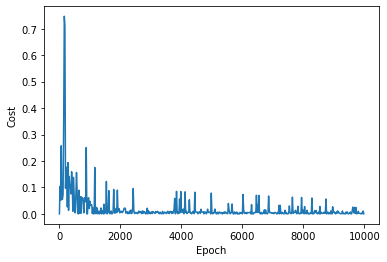

In [91]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [92]:
predict(2600, 4, w_sgd, b_sgd)

array([[128.47499043]])

Mini Batch Gradient Descent

In [112]:
def mini_batch_gradient_descent(X, y_true, batch_size, epochs, learning_rate = 0.01):
    
    num_features = X.shape[1]
    
    w = np.ones(shape=(num_features))
    b = 0
    total_samples = X.shape[0]
    
    if batch_size>total_samples:
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        # random_index = random.sample([i for i in range(total_samples)], batch_size)
        random_indices = np.random.permutation(total_samples)
        X_temp = X[random_indices]
        y_temp = y_true[random_indices]
        
        for j in range(0, total_samples, batch_size):
            sample_x = X[j:j+batch_size]
            sample_y = y_true[j:j+batch_size]

            y_predicted = np.dot(w, sample_x.T) + b
            error = sample_y-y_predicted

            w_grad = -(2/len(sample_x)) * np.dot(sample_x.T, error)
            b_grad = -(2/len(sample_x)) * np.sum(error)
            
            w -= learning_rate*w_grad
            b -= learning_rate*b_grad
            
            cost = np.mean(np.power(error, 2))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
        print('Epoch: {}, cost={}'.format(i, cost))
    
    return w, b, cost, cost_list, epoch_list

In [130]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), batch_size=5, epochs=1000)

Epoch: 0, cost=0.18541854103623817
Epoch: 1, cost=0.15200608232154808
Epoch: 2, cost=0.12554008736708616
Epoch: 3, cost=0.1045901522114133
Epoch: 4, cost=0.08801770705794754
Epoch: 5, cost=0.0749168075980622
Epoch: 6, cost=0.064566899663525
Epoch: 7, cost=0.056395140541346464
Epoch: 8, cost=0.04994634751696529
Epoch: 9, cost=0.0448590332751884
Epoch: 10, cost=0.040846298454527696
Epoch: 11, cost=0.03768059971023098
Epoch: 12, cost=0.035181609705305726
Epoch: 13, cost=0.0332065435885457
Epoch: 14, cost=0.03164245277711923
Epoch: 15, cost=0.030400087661962755
Epoch: 16, cost=0.029409011326659483
Epoch: 17, cost=0.028613710611112113
Epoch: 18, cost=0.02797050213145035
Epoch: 19, cost=0.02744507179959226
Epoch: 20, cost=0.027010519055776484
Epoch: 21, cost=0.02664580310100148
Epoch: 22, cost=0.026334509223804526
Epoch: 23, cost=0.026063869919317452
Epoch: 24, cost=0.02582398874612188
Epoch: 25, cost=0.02560722543524424
Epoch: 26, cost=0.02540770919632605
Epoch: 27, cost=0.0252209538902316


Epoch: 274, cost=0.009916043868442925
Epoch: 275, cost=0.009901520666244178
Epoch: 276, cost=0.00988710705060666
Epoch: 277, cost=0.009872801847026574
Epoch: 278, cost=0.00985860389556813
Epoch: 279, cost=0.00984451205066528
Epoch: 280, cost=0.009830525180926312
Epoch: 281, cost=0.009816642168941327
Epoch: 282, cost=0.009802861911092465
Epoch: 283, cost=0.009789183317366858
Epoch: 284, cost=0.009775605311172306
Epoch: 285, cost=0.009762126829155587
Epoch: 286, cost=0.009748746821023427
Epoch: 287, cost=0.009735464249366005
Epoch: 288, cost=0.009722278089483024
Epoch: 289, cost=0.009709187329212287
Epoch: 290, cost=0.009696190968760704
Epoch: 291, cost=0.009683288020537773
Epoch: 292, cost=0.009670477508991462
Epoch: 293, cost=0.009657758470446347
Epoch: 294, cost=0.009645129952944224
Epoch: 295, cost=0.009632591016086847
Epoch: 296, cost=0.009620140730881096
Epoch: 297, cost=0.009607778179586168
Epoch: 298, cost=0.009595502455563142
Epoch: 299, cost=0.009583312663126536
Epoch: 300, cos

Epoch: 571, cost=0.007851674658429734
Epoch: 572, cost=0.007848105790416207
Epoch: 573, cost=0.007844546505776179
Epoch: 574, cost=0.007840996748872755
Epoch: 575, cost=0.0078374564645322
Epoch: 576, cost=0.007833925598039537
Epoch: 577, cost=0.007830404095134169
Epoch: 578, cost=0.007826891902005542
Epoch: 579, cost=0.007823388965288947
Epoch: 580, cost=0.007819895232061185
Epoch: 581, cost=0.007816410649836436
Epoch: 582, cost=0.007812935166562136
Epoch: 583, cost=0.007809468730614838
Epoch: 584, cost=0.007806011290796186
Epoch: 585, cost=0.007802562796328903
Epoch: 586, cost=0.007799123196852803
Epoch: 587, cost=0.00779569244242089
Epoch: 588, cost=0.0077922704834954394
Epoch: 589, cost=0.007788857270944183
Epoch: 590, cost=0.007785452756036494
Epoch: 591, cost=0.007782056890439625
Epoch: 592, cost=0.007778669626214987
Epoch: 593, cost=0.007775290915814423
Epoch: 594, cost=0.00777192071207663
Epoch: 595, cost=0.007768558968223471
Epoch: 596, cost=0.007765205637856473
Epoch: 597, cos

Epoch: 872, cost=0.007057751440164267
Epoch: 873, cost=0.007055744123709372
Epoch: 874, cost=0.00705373977146474
Epoch: 875, cost=0.007051738376368415
Epoch: 876, cost=0.007049739931395164
Epoch: 877, cost=0.007047744429556182
Epoch: 878, cost=0.007045751863898808
Epoch: 879, cost=0.007043762227506284
Epoch: 880, cost=0.007041775513497462
Epoch: 881, cost=0.007039791715026553
Epoch: 882, cost=0.007037810825282839
Epoch: 883, cost=0.007035832837490446
Epoch: 884, cost=0.007033857744908054
Epoch: 885, cost=0.007031885540828653
Epoch: 886, cost=0.007029916218579295
Epoch: 887, cost=0.007027949771520828
Epoch: 888, cost=0.007025986193047626
Epoch: 889, cost=0.007024025476587384
Epoch: 890, cost=0.007022067615600832
Epoch: 891, cost=0.007020112603581518
Epoch: 892, cost=0.00701816043405556
Epoch: 893, cost=0.0070162111005813545
Epoch: 894, cost=0.007014264596749425
Epoch: 895, cost=0.007012320916182109
Epoch: 896, cost=0.0070103800525333744
Epoch: 897, cost=0.007008441999488543
Epoch: 898, 

In [131]:
w_mbgd, b_mbgd, cost_mbgd

(array([0.72985949, 0.44878268]), -0.12374586277655412, 0.006824504140503881)

Text(0, 0.5, 'Cost')

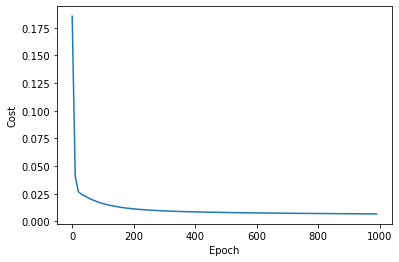

In [132]:
plt.plot(epoch_list_mbgd, cost_list_mbgd)
plt.xlabel('Epoch')
plt.ylabel('Cost')

In [133]:
predict(2600, 4, w_mbgd, b_mbgd)

array([[121.89074654]])